In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./test_images/messi.jpg')
img.shape

(960, 1280, 3)

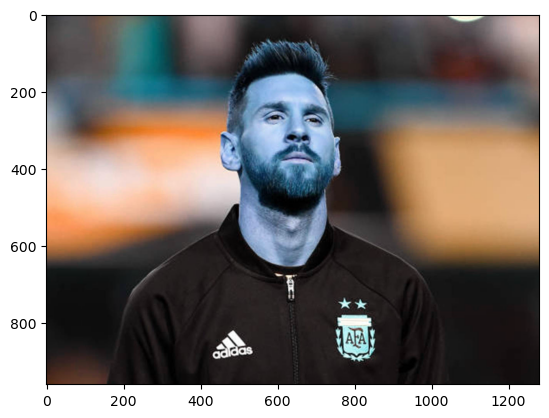

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(960, 1280)

In [5]:
gray

array([[ 49,  50,  50, ..., 174, 173, 173],
       [ 49,  50,  50, ..., 174, 173, 173],
       [ 49,  50,  50, ..., 174, 174, 174],
       ...,
       [ 39,  39,  40, ...,  18,  18,  18],
       [ 39,  39,  40, ...,  18,  18,  18],
       [ 39,  39,  40, ...,  18,  18,  18]], dtype=uint8)

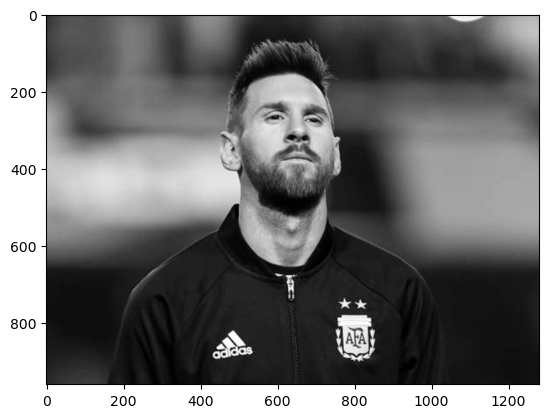

In [6]:
plt.imshow(gray, cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3,5)
faces

array([[504, 146, 289, 289]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(504, 146, 289, 289)

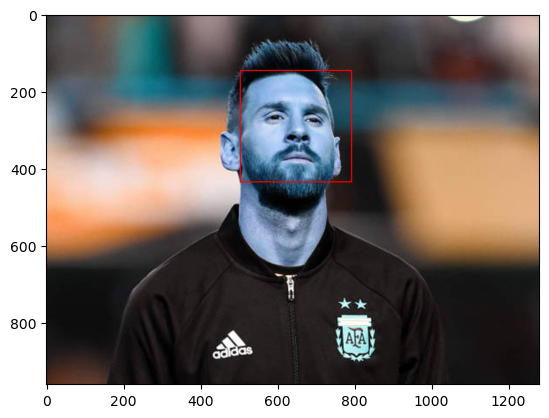

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

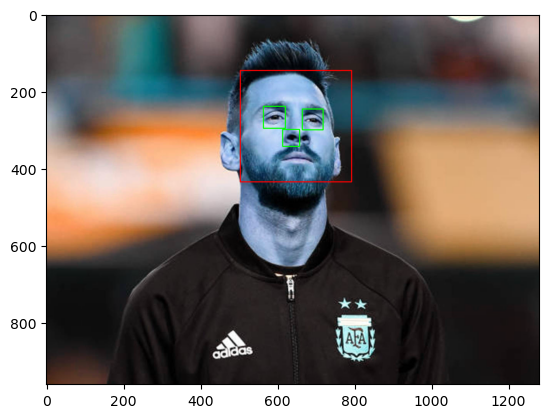

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0,),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

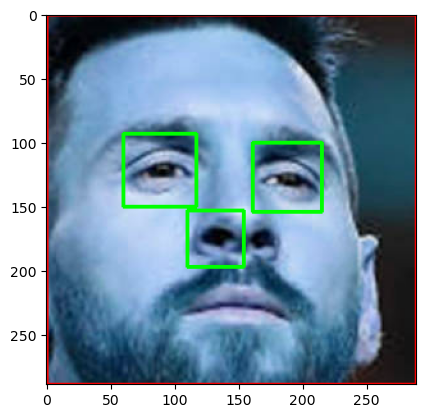

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [12]:
def get_cropped_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"failed to read image: {image_path}")
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >=2:
            return roi_color
    return None

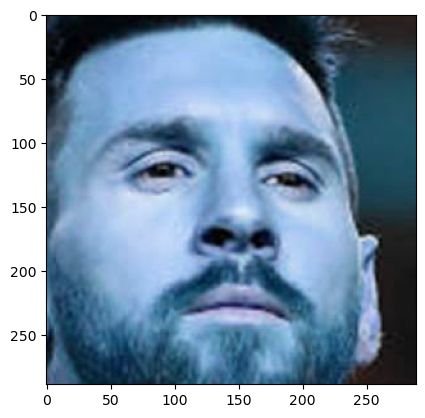

In [13]:
cropped_image = get_cropped_image('./test_images/messi.jpg')
plt.imshow(cropped_image)

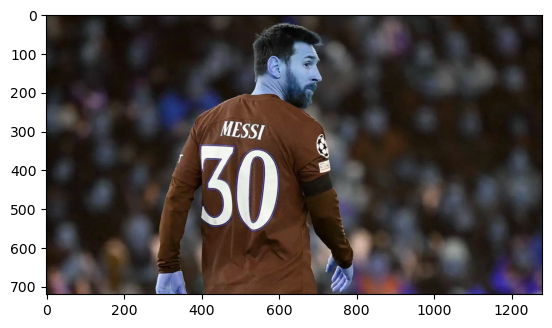

In [14]:
org_image = cv2.imread('./test_images/messi2.jpg')
plt.imshow(org_image)


In [15]:
crp_image = get_cropped_image('./test_images/messi2.jpg')
crp_image

In [16]:
path_to_data = "./Dataset"
path_to_cr_data = "./Dataset/Cropped"

In [17]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [18]:
img_dirs

['./Dataset\\Cropped',
 './Dataset\\John_Cena',
 './Dataset\\Kobe_Bryant',
 './Dataset\\Lionel_Messi',
 './Dataset\\Mahendra_Dhoni',
 './Dataset\\Roger_Federer']

In [19]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [20]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('\\')[-1]
    
    print(celebrity_name)
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image(entry.path)
        if roi_color is not None:
            cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)
            
            cropped_file_name = celebrity_name + str(count) + '.png'
            cropped_file_path = os.path.join(cropped_folder , cropped_file_name)
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1
    

Cropped
John_Cena
failed to read image: ./Dataset\John_Cena\.jpg
Generating cropped images in folder:  ./Dataset/Cropped\John_Cena
failed to read image: ./Dataset\John_Cena\pageInfo.txt
Kobe_Bryant
Generating cropped images in folder:  ./Dataset/Cropped\Kobe_Bryant
failed to read image: ./Dataset\Kobe_Bryant\pageInfo.txt
Lionel_Messi
Generating cropped images in folder:  ./Dataset/Cropped\Lionel_Messi
Mahendra_Dhoni
Generating cropped images in folder:  ./Dataset/Cropped\Mahendra_Dhoni
Roger_Federer
failed to read image: ./Dataset\Roger_Federer\.jpg
Generating cropped images in folder:  ./Dataset/Cropped\Roger_Federer
failed to read image: ./Dataset\Roger_Federer\pageInfo.txt


In [21]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Cropped\\John_Cena': ['./Dataset/Cropped\\John_Cena\\John_Cena1.png',
  './Dataset/Cropped\\John_Cena\\John_Cena10.png',
  './Dataset/Cropped\\John_Cena\\John_Cena11.png',
  './Dataset/Cropped\\John_Cena\\John_Cena12.png',
  './Dataset/Cropped\\John_Cena\\John_Cena13.png',
  './Dataset/Cropped\\John_Cena\\John_Cena14.png',
  './Dataset/Cropped\\John_Cena\\John_Cena15.png',
  './Dataset/Cropped\\John_Cena\\John_Cena16.png',
  './Dataset/Cropped\\John_Cena\\John_Cena17.png',
  './Dataset/Cropped\\John_Cena\\John_Cena18.png',
  './Dataset/Cropped\\John_Cena\\John_Cena19.png',
  './Dataset/Cropped\\John_Cena\\John_Cena2.png',
  './Dataset/Cropped\\John_Cena\\John_Cena20.png',
  './Dataset/Cropped\\John_Cena\\John_Cena21.png',
  './Dataset/Cropped\\John_Cena\\John_Cena22.png',
  './Dataset/Cropped\\John_Cena\\John_Cena23.png',
  './Dataset/Cropped\\John_Cena\\John_Cena24.png',
  './Dataset/Cropped\\John_Cena\\John_Cena25.png',
  './Dataset/Cropped\\John_Cena\\John_Cena26.png',
  './Datase

In [22]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    imArray = np.float32(imArray)
    imArray /= 255;
    coeffs=pywt.wavedec2(imArray, mode, level=level)
    
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;
    
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H
    

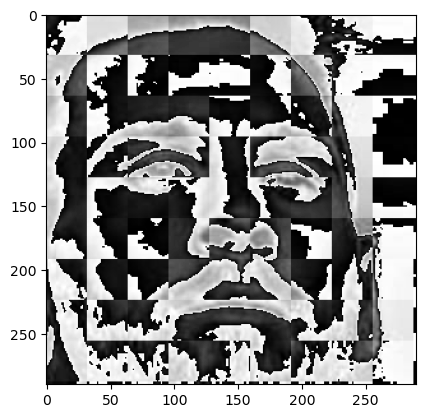

In [23]:
im_har = w2d(cropped_image, 'db1',5)
plt.imshow(im_har, cmap='gray')

In [43]:
class_dict ={}
count =0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Cropped\\John_Cena': 0,
 'Cropped\\Kobe_Bryant': 1,
 'Cropped\\Lionel_Messi': 2,
 'Cropped\\Mahendra_Dhoni': 3,
 'Cropped\\Roger_Federer': 4}

In [44]:
X = []
y = []


for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        if img is None:
            continue
        scaled_raw_img =cv2.resize(img,(32,32))
        img_har = w2d(img, 'db1', 5)
        scaled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1), scaled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])
        

In [45]:
len(X[0])

4096

In [46]:
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(145, 4096)

In [47]:
X[0]

array([249., 251., 253., ...,   0.,   0.,   0.])

In [48]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C=10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7837837837837838

In [50]:
len(X_test)

37

In [51]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       1.00      1.00      1.00         2
           2       1.00      0.89      0.94         9
           3       0.57      0.67      0.62         6
           4       0.50      0.40      0.44         5

    accuracy                           0.78        37
   macro avg       0.78      0.76      0.77        37
weighted avg       0.79      0.78      0.78        37



In [52]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [53]:
model_params = {
    'svm' : {
        'model' : svm.SVC(gamma='auto', probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel' : ['rbf', 'linear']
        }
    },
    'random_forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators' : [1,5,10]
        }
    },
    'logistic_regression' : {
        'model' : LogisticRegression(solver='liblinear', multi_class='auto'),
        'params' : {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [54]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.677056,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.573160,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.732468,{'logisticregression__C': 1}


In [55]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=10, gamma='auto', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [56]:
best_estimators['svm'].score(X_test,y_test)

0.7837837837837838

In [57]:
best_estimators['random_forest'].score(X_test,y_test)

0.6756756756756757

In [58]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7837837837837838

In [59]:
best_clf = best_estimators['logistic_regression']

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[12,  1,  0,  1,  1],
       [ 0,  2,  0,  0,  0],
       [ 1,  0,  8,  0,  0],
       [ 0,  0,  0,  5,  1],
       [ 1,  1,  0,  1,  2]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

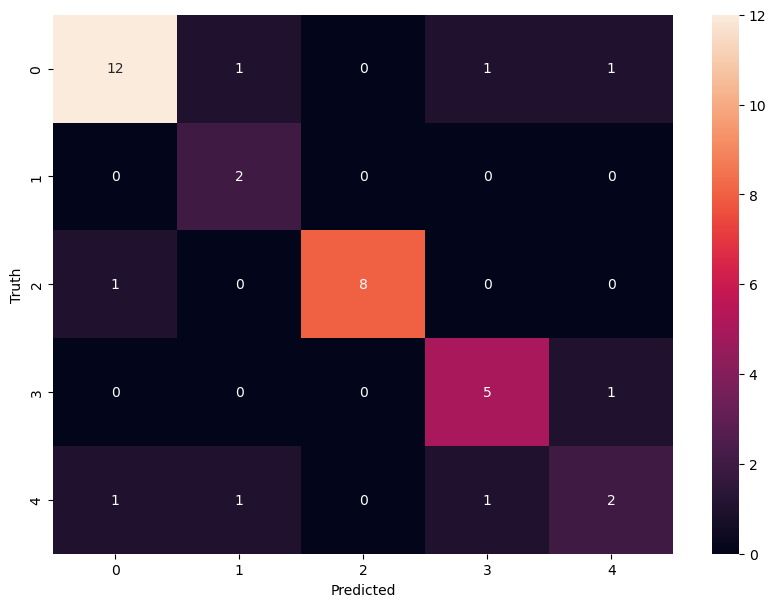

In [61]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [62]:
class_dict

{'Cropped\\John_Cena': 0,
 'Cropped\\Kobe_Bryant': 1,
 'Cropped\\Lionel_Messi': 2,
 'Cropped\\Mahendra_Dhoni': 3,
 'Cropped\\Roger_Federer': 4}

In [63]:
!pip install joblib
import joblib
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [64]:
import json
with open('class_dictionary.json','w') as f:
    f.write(json.dumps(class_dict))